### We are importing some libraries

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [128]:
data = pd.read_csv('milknew.csv')

In [130]:
data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [131]:
data.tail()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high
1058,8.6,55,0,1,1,1,255,low


In [132]:
data.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

## Preprocessing the data

In [133]:
data.isnull

<bound method DataFrame.isnull of        pH  Temprature  Taste  Odor  Fat   Turbidity  Colour   Grade
0     6.6          35      1     0     1          0     254    high
1     6.6          36      0     1     0          1     253    high
2     8.5          70      1     1     1          1     246     low
3     9.5          34      1     1     0          1     255     low
4     6.6          37      0     0     0          0     255  medium
...   ...         ...    ...   ...   ...        ...     ...     ...
1054  6.7          45      1     1     0          0     247  medium
1055  6.7          38      1     0     1          0     255    high
1056  3.0          40      1     1     1          1     255     low
1057  6.8          43      1     0     1          0     250    high
1058  8.6          55      0     1     1          1     255     low

[1059 rows x 8 columns]>

In [134]:
data.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [136]:
(data.isnull().sum())

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [137]:
data.notnull()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...
1054,True,True,True,True,True,True,True,True
1055,True,True,True,True,True,True,True,True
1056,True,True,True,True,True,True,True,True
1057,True,True,True,True,True,True,True,True


In [138]:
data.shape

(1059, 8)

In [139]:
data.value_counts()

pH   Temprature  Taste  Odor  Fat   Turbidity  Colour  Grade 
3.0  40          1      1     1     1          255     low       51
9.0  43          1      0     1     1          250     low       38
8.6  55          0      1     1     1          255     low       35
6.8  45          0      1     1     1          255     high      34
     40          1      0     1     0          245     medium    33
                                                                 ..
6.6  36          0      1     0     1          253     high       1
6.5  40          0      1     0     1          250     low        1
     45          1      0     0     0          246     medium     1
6.6  45          1      1     1     1          245     high       1
     35          1      0     1     0          254     high       1
Length: 83, dtype: int64

In [140]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1054     True
1055     True
1056     True
1057     True
1058     True
Length: 1059, dtype: bool

In [141]:
data.drop_duplicates()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
930,6.6,38,0,1,1,1,255,high
942,6.6,45,1,0,0,1,255,medium
957,6.8,41,1,1,1,0,255,high
985,6.5,45,1,0,0,0,246,medium


In [142]:
data.to_dict()

{'pH': {0: 6.6,
  1: 6.6,
  2: 8.5,
  3: 9.5,
  4: 6.6,
  5: 6.6,
  6: 5.5,
  7: 4.5,
  8: 8.1,
  9: 6.7,
  10: 6.7,
  11: 5.6,
  12: 8.6,
  13: 7.4,
  14: 6.8,
  15: 6.5,
  16: 4.7,
  17: 3.0,
  18: 9.0,
  19: 6.8,
  20: 6.6,
  21: 6.5,
  22: 4.5,
  23: 6.6,
  24: 6.8,
  25: 6.5,
  26: 8.5,
  27: 6.6,
  28: 6.5,
  29: 6.6,
  30: 6.4,
  31: 6.5,
  32: 6.8,
  33: 6.7,
  34: 6.7,
  35: 6.8,
  36: 8.6,
  37: 7.4,
  38: 6.8,
  39: 6.5,
  40: 6.8,
  41: 3.0,
  42: 9.0,
  43: 6.8,
  44: 6.6,
  45: 6.5,
  46: 6.6,
  47: 6.8,
  48: 9.5,
  49: 6.5,
  50: 6.6,
  51: 5.5,
  52: 4.5,
  53: 8.1,
  54: 6.7,
  55: 6.7,
  56: 5.6,
  57: 8.6,
  58: 7.4,
  59: 6.8,
  60: 6.5,
  61: 6.7,
  62: 3.0,
  63: 9.0,
  64: 8.6,
  65: 6.8,
  66: 6.8,
  67: 6.5,
  68: 4.7,
  69: 3.0,
  70: 9.0,
  71: 6.8,
  72: 6.6,
  73: 6.5,
  74: 4.5,
  75: 6.8,
  76: 6.5,
  77: 6.8,
  78: 8.5,
  79: 6.8,
  80: 6.5,
  81: 6.6,
  82: 6.8,
  83: 7.4,
  84: 6.8,
  85: 6.5,
  86: 6.6,
  87: 3.0,
  88: 9.0,
  89: 6.8,
  90: 6.6,
  9

In [144]:
data_sorted = data.sort_values(by=['Grade', 'Colour', 'pH', 'Temprature'], ascending=True)

# print the sorted dataframe
print(df_sorted)


       pH  Temprature  Taste  Odor  Fat   Turbidity  Colour   Grade
23    6.6          45      1     1     1          1     245    high
47    6.8          45      1     1     1          0     245    high
75    6.8          45      1     1     1          1     245    high
93    6.8          45      1     1     1          0     245    high
123   6.8          45      1     1     1          1     245    high
...   ...         ...    ...   ...   ...        ...     ...     ...
922   6.8          41      0     0     0          0     255  medium
924   6.8          38      0     0     0          0     255  medium
993   6.8          41      0     0     1          0     255  medium
1000  6.8          45      0     0     0          1     255  medium
1031  6.8          41      0     0     1          0     255  medium

[1059 rows x 8 columns]


In [145]:
data.corr()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
pH,1.000000,0.244684,-0.064053,-0.081331,-0.093429,0.048384,-0.164565
Temprature,0.244684,1.000000,-0.109792,-0.048870,0.024073,0.185106,-0.008511
Taste,-0.064053,-0.109792,1.000000,0.017582,0.324149,0.055755,-0.082654
Odor,-0.081331,-0.048870,0.017582,1.000000,0.314505,0.457935,-0.039361
Fat,-0.093429,0.024073,0.324149,0.314505,1.000000,0.329264,0.114151
Turbidity,0.048384,0.185106,0.055755,0.457935,0.329264,1.000000,0.136436
Colour,-0.164565,-0.008511,-0.082654,-0.039361,0.114151,0.136436,1.000000


## EDA

In [117]:
%matplotlib inline

<AxesSubplot:>

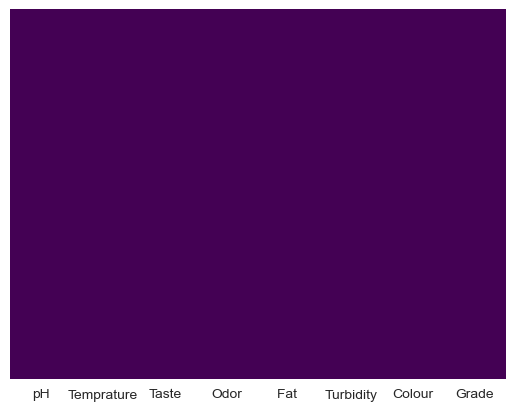

In [146]:
## We aree using heatmap to check the null values

sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

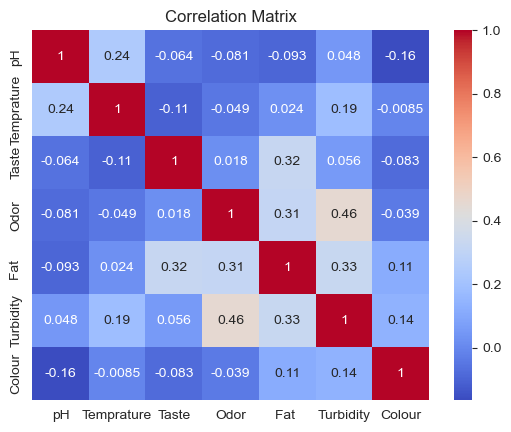

In [147]:
# Compute the correlation matrix
corr_matrix = data.corr()

# Create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Add a title to the plot
plt.title('Correlation Matrix')

# Show the plot
plt.show()

<AxesSubplot:xlabel='Temprature'>

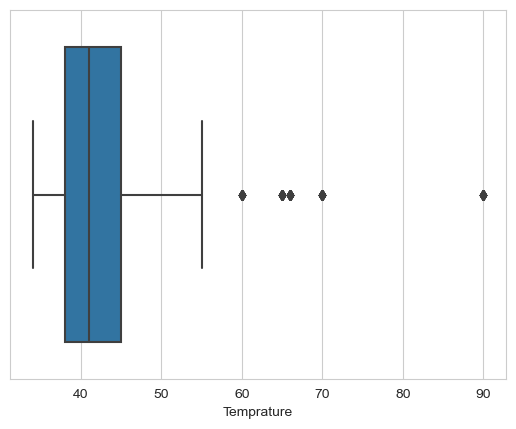

In [149]:
# we are checking outlires
sns.boxplot(x=data['Temprature'])


In [ ]:
## above fig no outliers is present

<AxesSubplot:xlabel='variable', ylabel='count'>

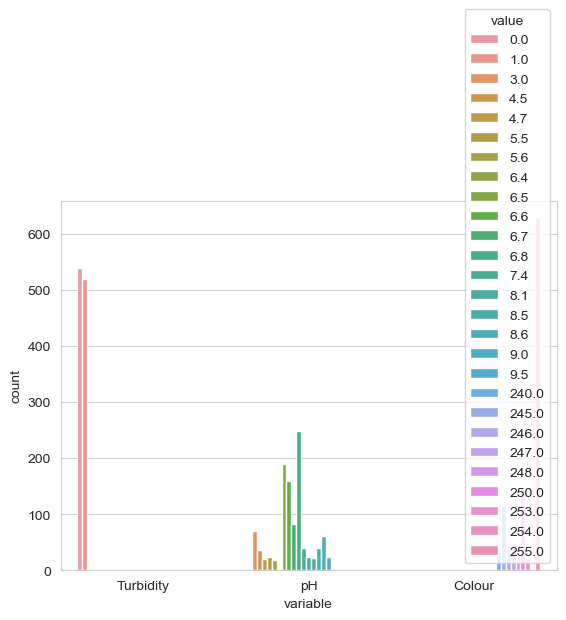

In [151]:
# assuming df is a pandas dataframe with columns Turbidity, pH, and Colour

sns.set_style(style='whitegrid')
sns.countplot(x='variable', hue='value', data=pd.melt(data[['Turbidity', 'pH', 'Colour']]))

<AxesSubplot:xlabel='Turbidity', ylabel='count'>

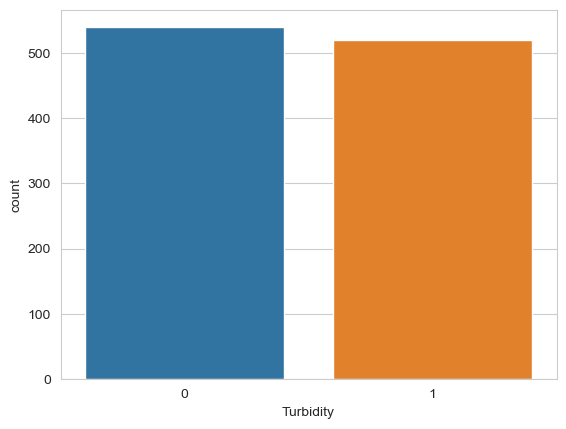

In [152]:
sns.set_style(style='whitegrid')
sns.countplot(x='Turbidity',data=data)

<AxesSubplot:xlabel='pH', ylabel='count'>

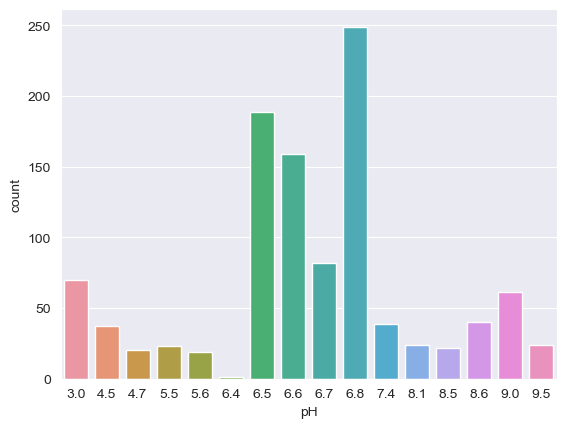

In [153]:
sns.set_style(style='darkgrid')
sns.countplot(x='pH',data=data)

<AxesSubplot:xlabel='Temprature', ylabel='count'>

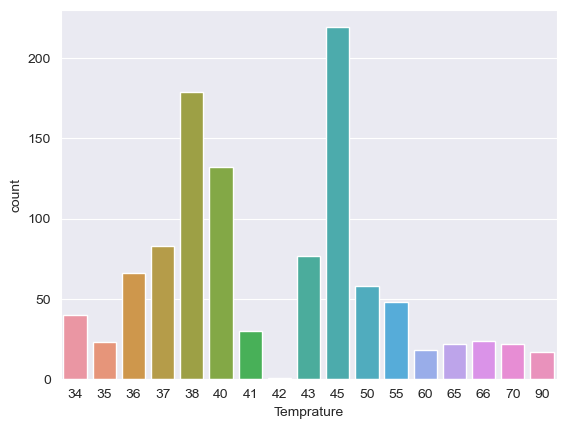

In [154]:
sns.set_style(style='darkgrid')
sns.countplot(x='Temprature',data=data)

<AxesSubplot:>

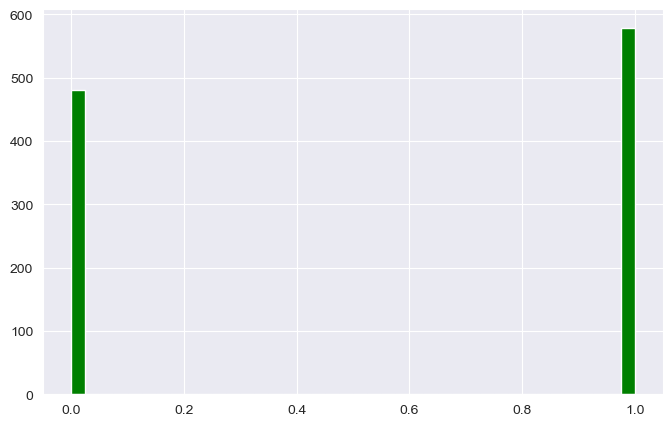

In [155]:
data['Taste'].hist(color='green',bins=40,figsize=(8,5))

<AxesSubplot:>

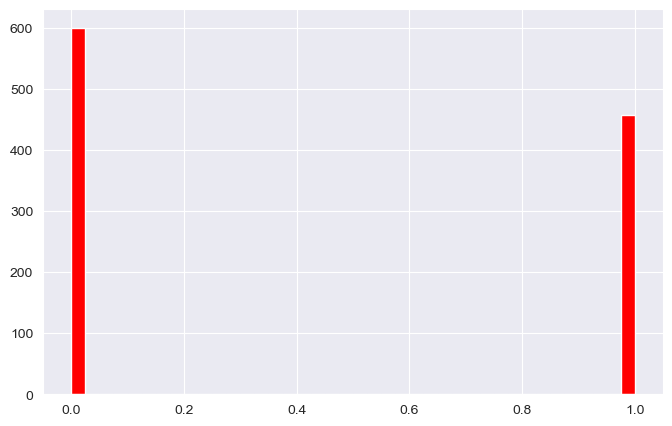

In [156]:
data['Odor'].hist(color='r',bins=40,figsize=(8,5))

<AxesSubplot:xlabel='Odor'>

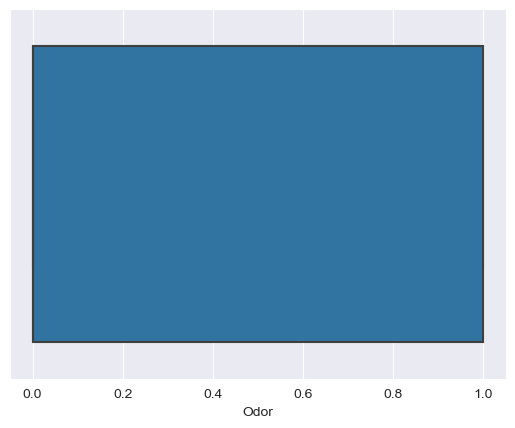

In [157]:
sns.boxplot(x='Odor', data=data)

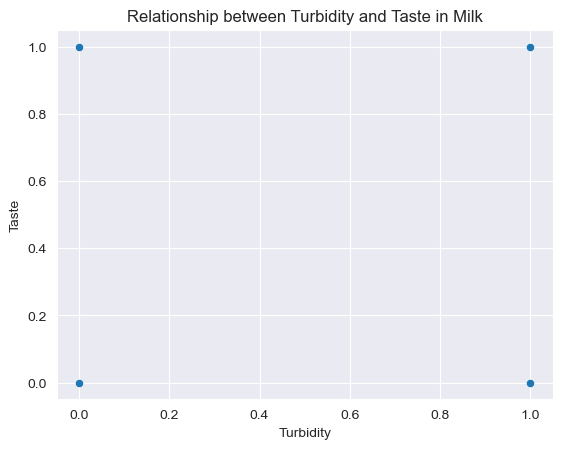

In [158]:
# Create a scatter plot with 'Turbidity' and 'Taste'
sns.scatterplot(x='Turbidity', y='Taste', data=data)

# Add axis labels and a title to the plot
plt.xlabel('Turbidity')
plt.ylabel('Taste')
plt.title('Relationship between Turbidity and Taste in Milk')

# Show the plot
plt.show()

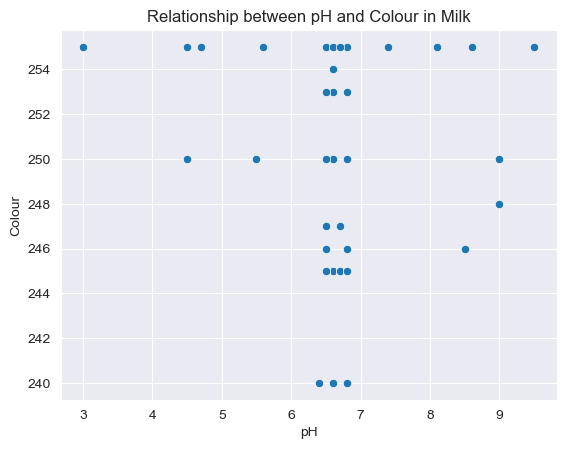

In [159]:
# Create a scatter plot with 'Turbidity' and 'Taste'
sns.scatterplot(x='pH', y='Colour', data=data)

# Add axis labels and a title to the plot
plt.xlabel('pH')
plt.ylabel('Colour')
plt.title('Relationship between pH and Colour in Milk')

# Show the plot
plt.show()

## We are doing one hot Encoding

In [160]:
data.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

In [162]:


# create a sample milk dataframe
df = pd.DataFrame({'Grade': ['hign', 'low', 'medium']})

# one hot encode the 'Grade' column using pandas get_dummies function
one_hot_encoded = pd.get_dummies(df['Grade'], prefix='Grade')

# merge the one hot encoded dataframe with the original dataframe
df = pd.concat([df, one_hot_encoded], axis=1)

# drop the original 'Grade' column
df = df.drop('Grade', axis=1)

# print the resulting dataframe
print(df)


   Grade_hign  Grade_low  Grade_medium
0           1          0             0
1           0          1             0
2           0          0             1


## We are using minmax scaler to normalize the value

In [174]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[['Temprature_normalized', 'Colour_normalized', 'pH_normalized']] = scaler.fit_transform(data[['Temprature', 'Colour', 'pH']])
print(data[['Temprature_normalized', 'Colour_normalized', 'pH']])

      Temprature_normalized  Colour_normalized   pH
0                  0.017857           0.933333  6.6
1                  0.035714           0.866667  6.6
2                  0.642857           0.400000  8.5
3                  0.000000           1.000000  9.5
4                  0.053571           1.000000  6.6
...                     ...                ...  ...
1054               0.196429           0.466667  6.7
1055               0.071429           1.000000  6.7
1056               0.107143           1.000000  3.0
1057               0.160714           0.666667  6.8
1058               0.375000           1.000000  8.6

[1059 rows x 3 columns]


In [175]:
data

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade,Temprature_normalized,Colour_normalized,pH_normalized
0,6.6,35,1,0,1,0,254,high,0.017857,0.933333,0.553846
1,6.6,36,0,1,0,1,253,high,0.035714,0.866667,0.553846
2,8.5,70,1,1,1,1,246,low,0.642857,0.400000,0.846154
3,9.5,34,1,1,0,1,255,low,0.000000,1.000000,1.000000
4,6.6,37,0,0,0,0,255,medium,0.053571,1.000000,0.553846
...,...,...,...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium,0.196429,0.466667,0.569231
1055,6.7,38,1,0,1,0,255,high,0.071429,1.000000,0.569231
1056,3.0,40,1,1,1,1,255,low,0.107143,1.000000,0.000000
1057,6.8,43,1,0,1,0,250,high,0.160714,0.666667,0.584615


In [176]:
df

,Grade_hign,Grade_low,Grade_medium
0,1,0,0
1,0,1,0
2,0,0,1


In [179]:


# lets concatenate previous 'data' and new 'df' is the new dataframe to be concatenated
concatenated_data = pd.concat([data,df], axis=0)


In [180]:
concatenated_data

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade,Temprature_normalized,Colour_normalized,pH_normalized,Grade_hign,Grade_low,Grade_medium
0,6.6,35.0,1.0,0.0,1.0,0.0,254.0,high,0.017857,0.933333,0.553846,NaN,NaN,NaN
1,6.6,36.0,0.0,1.0,0.0,1.0,253.0,high,0.035714,0.866667,0.553846,NaN,NaN,NaN
2,8.5,70.0,1.0,1.0,1.0,1.0,246.0,low,0.642857,0.400000,0.846154,NaN,NaN,NaN
3,9.5,34.0,1.0,1.0,0.0,1.0,255.0,low,0.000000,1.000000,1.000000,NaN,NaN,NaN
4,6.6,37.0,0.0,0.0,0.0,0.0,255.0,medium,0.053571,1.000000,0.553846,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,6.8,43.0,1.0,0.0,1.0,0.0,250.0,high,0.160714,0.666667,0.584615,NaN,NaN,NaN
1058,8.6,55.0,0.0,1.0,1.0,1.0,255.0,low,0.375000,1.000000,0.861538,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0


In [184]:
concatenated_data.isnull()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade,Temprature_normalized,Colour_normalized,pH_normalized,Grade_hign,Grade_low,Grade_medium
0,False,False,False,False,False,False,False,False,False,False,False,True,True,True
1,False,False,False,False,False,False,False,False,False,False,False,True,True,True
2,False,False,False,False,False,False,False,False,False,False,False,True,True,True
3,False,False,False,False,False,False,False,False,False,False,False,True,True,True
4,False,False,False,False,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,False,False,False,False,False,False,False,False,False,False,False,True,True,True
1058,False,False,False,False,False,False,False,False,False,False,False,True,True,True
0,True,True,True,True,True,True,True,True,True,True,True,False,False,False
1,True,True,True,True,True,True,True,True,True,True,True,False,False,False


In [187]:
(concatenated_data.isnull().sum())

pH                          3
Temprature                  3
Taste                       3
Odor                        3
Fat                         3
Turbidity                   3
Colour                      3
Grade                       3
Temprature_normalized       3
Colour_normalized           3
pH_normalized               3
Grade_hign               1059
Grade_low                1059
Grade_medium             1059
dtype: int64

In [ ]:
## As we can see there is a NAN values present. we havw to remove it. by using fillina.

In [190]:
# Assuming the dataframe is named 'df'
# Fill missing values with specific values for each column
fill_values = {'pH': 7.0, 'Temprature': 25.0, 'Taste': 0, 'Odor': 0, 'Fat': 0, 'Turbidity': 0, 'Colour': 0, 'Grade': 'low', 'Temprature_normalized': 0.0, 'Colour_normalized': 0.0, 'pH_normalized': 0.0, 'Grade_hign': 0, 'Grade_low': 0, 'Grade_medium': 0}
concatenated_data = concatenated_data.fillna(value=fill_values)


In [191]:
concatenated_data

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade,Temprature_normalized,Colour_normalized,pH_normalized,Grade_hign,Grade_low,Grade_medium
0,6.6,35.0,1.0,0.0,1.0,0.0,254.0,high,0.017857,0.933333,0.553846,0.0,0.0,0.0
1,6.6,36.0,0.0,1.0,0.0,1.0,253.0,high,0.035714,0.866667,0.553846,0.0,0.0,0.0
2,8.5,70.0,1.0,1.0,1.0,1.0,246.0,low,0.642857,0.400000,0.846154,0.0,0.0,0.0
3,9.5,34.0,1.0,1.0,0.0,1.0,255.0,low,0.000000,1.000000,1.000000,0.0,0.0,0.0
4,6.6,37.0,0.0,0.0,0.0,0.0,255.0,medium,0.053571,1.000000,0.553846,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,6.8,43.0,1.0,0.0,1.0,0.0,250.0,high,0.160714,0.666667,0.584615,0.0,0.0,0.0
1058,8.6,55.0,0.0,1.0,1.0,1.0,255.0,low,0.375000,1.000000,0.861538,0.0,0.0,0.0
0,7.0,25.0,0.0,0.0,NaN,0.0,0.0,low,0.000000,0.000000,0.000000,1.0,0.0,0.0
1,7.0,25.0,0.0,0.0,NaN,0.0,0.0,low,0.000000,0.000000,0.000000,0.0,1.0,0.0


In [192]:
concatenated_data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade,Temprature_normalized,Colour_normalized,pH_normalized,Grade_hign,Grade_low,Grade_medium
0,6.6,35.0,1.0,0.0,1.0,0.0,254.0,high,0.017857,0.933333,0.553846,0.0,0.0,0.0
1,6.6,36.0,0.0,1.0,0.0,1.0,253.0,high,0.035714,0.866667,0.553846,0.0,0.0,0.0
2,8.5,70.0,1.0,1.0,1.0,1.0,246.0,low,0.642857,0.400000,0.846154,0.0,0.0,0.0
3,9.5,34.0,1.0,1.0,0.0,1.0,255.0,low,0.000000,1.000000,1.000000,0.0,0.0,0.0
4,6.6,37.0,0.0,0.0,0.0,0.0,255.0,medium,0.053571,1.000000,0.553846,0.0,0.0,0.0


In [196]:
concatenated_data.tail()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade,Temprature_normalized,Colour_normalized,pH_normalized,Grade_hign,Grade_low,Grade_medium
1057,6.8,43.0,1.0,0.0,1.0,0.0,250.0,high,0.160714,0.666667,0.584615,0.0,0.0,0.0
1058,8.6,55.0,0.0,1.0,1.0,1.0,255.0,low,0.375000,1.000000,0.861538,0.0,0.0,0.0
0,7.0,25.0,0.0,0.0,NaN,0.0,0.0,low,0.000000,0.000000,0.000000,1.0,0.0,0.0
1,7.0,25.0,0.0,0.0,NaN,0.0,0.0,low,0.000000,0.000000,0.000000,0.0,1.0,0.0
2,7.0,25.0,0.0,0.0,NaN,0.0,0.0,low,0.000000,0.000000,0.000000,0.0,0.0,1.0


In [209]:
concatenated_data


,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade,Temprature_normalized,Colour_normalized,pH_normalized,Grade_hign,Grade_low,Grade_medium
0,6.6,35.0,1.0,0.0,1.0,0.0,254.0,high,0.017857,0.933333,0.553846,0.0,0.0,0.0
1,6.6,36.0,0.0,1.0,0.0,1.0,253.0,high,0.035714,0.866667,0.553846,0.0,0.0,0.0
2,8.5,70.0,1.0,1.0,1.0,1.0,246.0,low,0.642857,0.400000,0.846154,0.0,0.0,0.0
3,9.5,34.0,1.0,1.0,0.0,1.0,255.0,low,0.000000,1.000000,1.000000,0.0,0.0,0.0
4,6.6,37.0,0.0,0.0,0.0,0.0,255.0,medium,0.053571,1.000000,0.553846,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,6.8,43.0,1.0,0.0,1.0,0.0,250.0,high,0.160714,0.666667,0.584615,0.0,0.0,0.0
1058,8.6,55.0,0.0,1.0,1.0,1.0,255.0,low,0.375000,1.000000,0.861538,0.0,0.0,0.0
0,7.0,25.0,0.0,0.0,NaN,0.0,0.0,low,0.000000,0.000000,0.000000,1.0,0.0,0.0
1,7.0,25.0,0.0,0.0,NaN,0.0,0.0,low,0.000000,0.000000,0.000000,0.0,1.0,0.0


In [210]:
concatenated_data.dropna(inplace=True)


In [211]:
print(concatenated_data)

       pH  Temprature  Taste  Odor  Fat   Turbidity  Colour   Grade  \
0     6.6        35.0    1.0   0.0   1.0        0.0   254.0    high   
1     6.6        36.0    0.0   1.0   0.0        1.0   253.0    high   
2     8.5        70.0    1.0   1.0   1.0        1.0   246.0     low   
3     9.5        34.0    1.0   1.0   0.0        1.0   255.0     low   
4     6.6        37.0    0.0   0.0   0.0        0.0   255.0  medium   
...   ...         ...    ...   ...   ...        ...     ...     ...   
1054  6.7        45.0    1.0   1.0   0.0        0.0   247.0  medium   
1055  6.7        38.0    1.0   0.0   1.0        0.0   255.0    high   
1056  3.0        40.0    1.0   1.0   1.0        1.0   255.0     low   
1057  6.8        43.0    1.0   0.0   1.0        0.0   250.0    high   
1058  8.6        55.0    0.0   1.0   1.0        1.0   255.0     low   

      Temprature_normalized  Colour_normalized  pH_normalized  Grade_hign  \
0                  0.017857           0.933333       0.553846         

## Great now we cleaned the data and also removed null values

## Train test split

In [212]:
from sklearn.model_selection import train_test_split

# Split data into features and target
X = concatenated_data.drop('Grade', axis=1)
y = concatenated_data['Grade']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Training and predicting

In [213]:
from sklearn.linear_model import LogisticRegression

In [214]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\91808\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [215]:
predictions = logmodel.predict(X_test)

In [219]:
from sklearn.metrics import precision_score, recall_score, f1_score
# fit the model on the training data
logmodel.fit(X_train, y_train)
# make predictions on test set
y_pred = logmodel.predict(X_test)

# calculate precision, recall, and f1 score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.6753613769742802
Recall: 0.6606166766050486
F1 Score: 0.6560445369544389


C:\Users\91808\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [220]:
from sklearn.metrics import confusion_matrix

In [221]:
accuracy=confusion_matrix(y_test,predictions)

In [222]:
accuracy

array([[15, 21, 12],
       [ 8, 64,  6],
       [ 5,  8, 73]], dtype=int64)

In [223]:
from sklearn.metrics import accuracy_score

In [224]:
accuracy=accuracy_score(y_test,predictions)

In [225]:
predictions

array(['low', 'low', 'low', 'low', 'medium', 'low', 'medium', 'low',
       'high', 'medium', 'low', 'medium', 'medium', 'medium', 'low',
       'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium',
       'medium', 'medium', 'medium', 'medium', 'low', 'high', 'low',
       'low', 'medium', 'medium', 'high', 'medium', 'low', 'medium',
       'medium', 'low', 'medium', 'medium', 'low', 'low', 'high',
       'medium', 'high', 'high', 'medium', 'medium', 'medium', 'medium',
       'medium', 'low', 'high', 'medium', 'medium', 'low', 'medium',
       'low', 'low', 'medium', 'medium', 'low', 'low', 'high', 'low',
       'high', 'medium', 'low', 'low', 'low', 'low', 'low', 'low',
       'medium', 'low', 'medium', 'medium', 'medium', 'low', 'low',
       'medium', 'medium', 'low', 'high', 'medium', 'medium', 'high',
       'low', 'medium', 'low', 'low', 'low', 'low', 'medium', 'low',
       'low', 'low', 'medium', 'low', 'medium', 'low', 'low', 'low',
       'low', 'medium', 'medium

In [229]:
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')
# print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.6999090380100728
Recall: 0.7169811320754716
F1 Score: 0.6993923888711224
